In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs ##amkes dataset blobs for clustering
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [5]:
X.shape

(1000, 2)

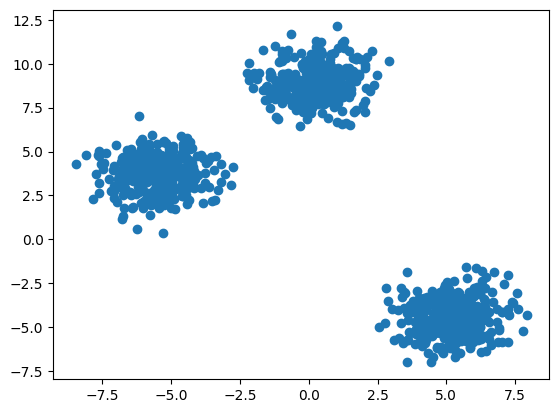

In [8]:
plt.scatter(X[:,0],X[:,1])

In [1]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
##we will not use y anywhere because we are only concerned about independent feaatures

NameError: name 'X' is not defined

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_train=pd.DataFrame(X_train)
print(X_train.isnull().sum())
X_train=X_train.fillna(X_train.mean())

In [22]:
##Manual process
##Elbow method to select value of K
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [24]:
wcss

[]

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

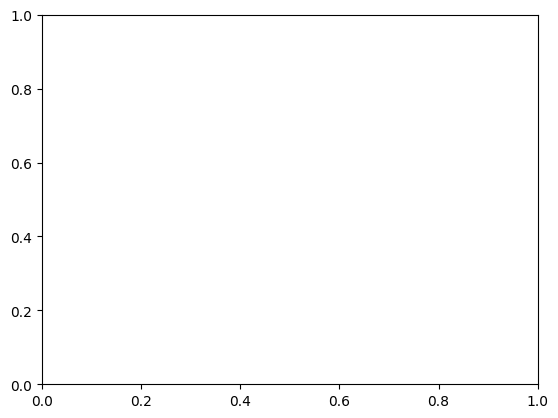

In [25]:
##plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [27]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [29]:
y_labels=kmeans.fit_predict(X_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [31]:
y_test_labels=kmeans.predict(X_test)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [32]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

KeyError: (slice(None, None, None), 0)

In [34]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

NameError: name 'y_test_labels' is not defined

In [35]:
##knee locator
!pip install kneed

In [36]:
from kneed import KneeLocator

In [41]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

ValueError: x and y arrays must be equal in length along interpolation axis.

In [43]:
## Performance metrics
from sklearn.metrics import silhouette_score

In [44]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [45]:
silhouette_coefficients

[]

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

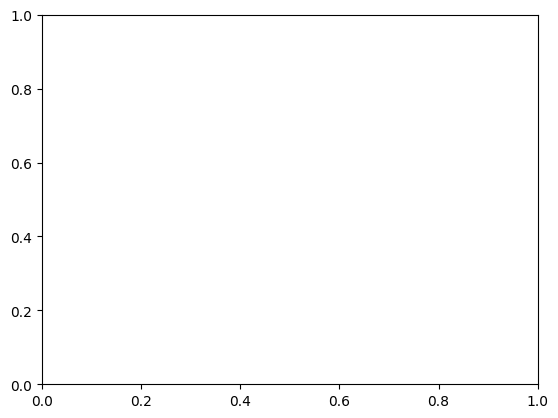

In [46]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()
